Skipping file 39_1_20170116174525125.jpg.chip.jpg: not enough values to unpack (expected 4, got 3)
Skipping file 61_1_20170109142408075.jpg.chip.jpg: not enough values to unpack (expected 4, got 3)
Skipping file 61_1_20170109150557335.jpg.chip.jpg: not enough values to unpack (expected 4, got 3)
                age
count  23705.000000
mean      33.300907
std       19.885708
min        1.000000
25%       23.000000
50%       29.000000
75%       45.000000
max      116.000000


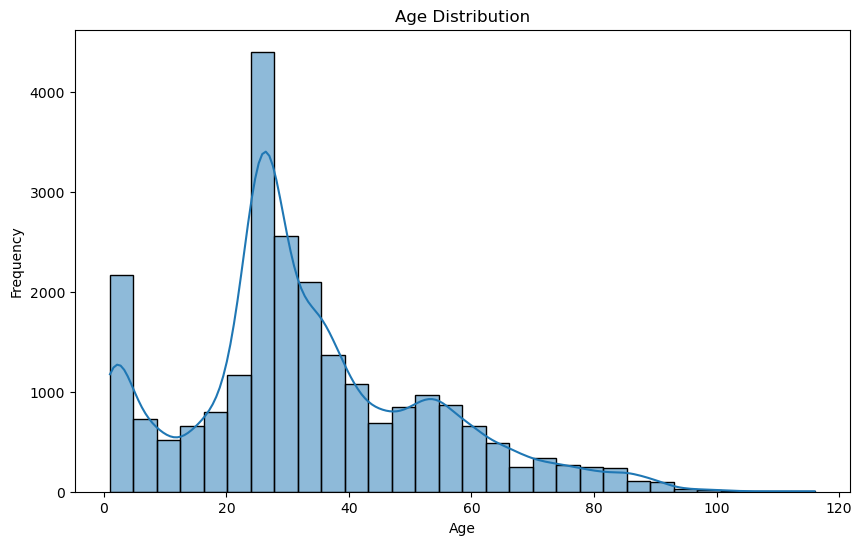

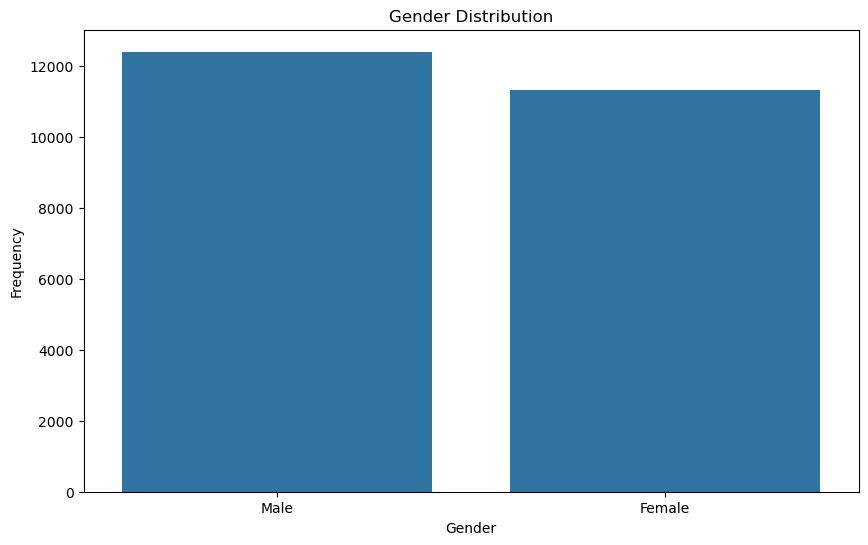

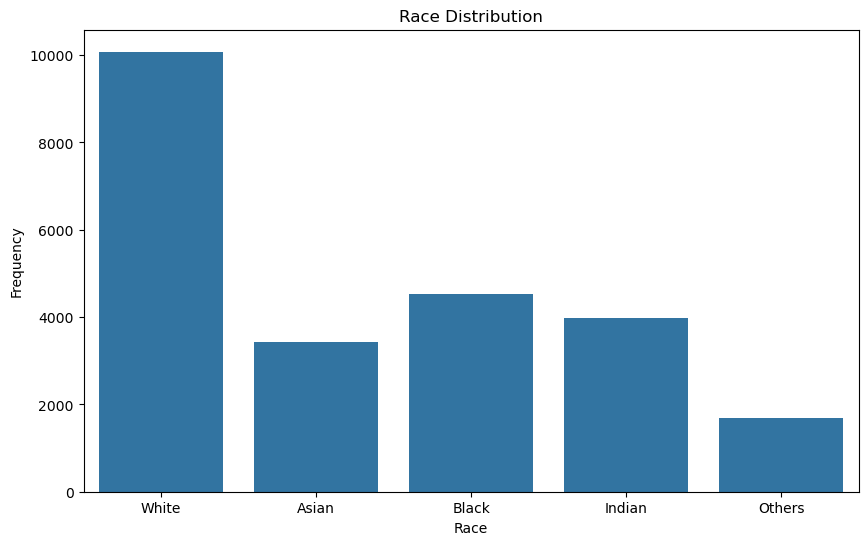

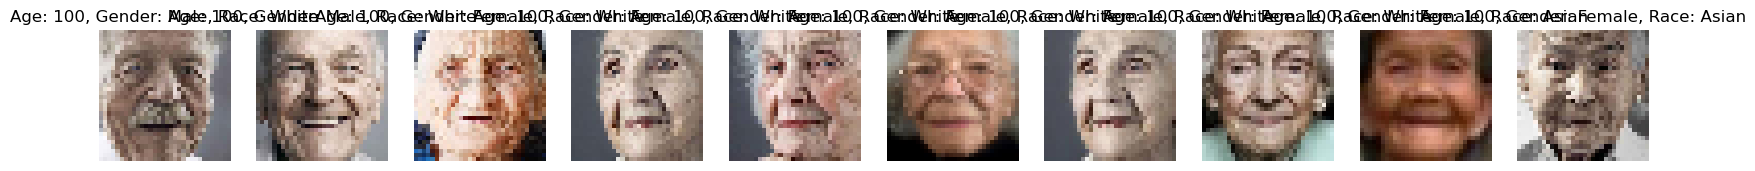

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the dataset
dataset_path = 'UTKFace'  

# Initialize lists to hold images and labels
images = []
ages = []
genders = []
races = []

# Load images and extract labels from filenames
for img_name in os.listdir(dataset_path):
    if img_name.endswith('.jpg'):
        try:
            age, gender, race, _ = img_name.split('_')
            ages.append(int(age))
            genders.append(int(gender))
            races.append(int(race))
            
            img_path = os.path.join(dataset_path, img_name)
            img = load_img(img_path, target_size=(32, 32))
            img = img_to_array(img)
            images.append(img)
        except ValueError as e:
            print(f"Skipping file {img_name}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
ages = np.array(ages)
genders = np.array(genders)
races = np.array(races)

# Create a DataFrame for EDA
data = pd.DataFrame({
    'age': ages,
    'gender': genders,
    'race': races
})

# Map gender and race labels to readable format
gender_map = {0: 'Male', 1: 'Female'}
race_map = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}
data['gender'] = data['gender'].map(gender_map)
data['race'] = data['race'].map(race_map)

# Display summary statistics
print(data.describe())

# Plot distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of genders
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of races
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=data)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

# Display sample images
def plot_sample_images(images, labels, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f'{labels[i]}')
        plt.axis("off")
    plt.show()

# Map labels for visualization
sample_labels = [f'Age: {age}, Gender: {gender}, Race: {race}' for age, gender, race in zip(ages, data['gender'], data['race'])]
plot_sample_images(images, sample_labels)